In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import average_precision_score
import scipy.sparse as sp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import requests

In [2]:
#загрузка датасетов
b_games = pd.read_feather('bgg_boardgames_top_2000.feather')
ratings = pd.read_feather('bgg_ratings_top_2000.feather')

===== Board Games =====
====================

boardgame_id - board game id <br>
title - title of board game <br>
year_published - year of publication of the board game <br>
minplayers - minimum number of players per game <br>
maxplayers - maximum number of players per game <br>
minplaytime - minimum playing time per game <br>
maxplaytime - maximum playing time per game <br>
age - lower age limit for playing <br>
users_rated - number of users who rated a game <br>
average_rating - average rating <br>
bayes_average_rating - bayes average rating <br>
median - median rating <br>
stddev - standard deviation of rating <br>
owned - number of users who have a game <br>
trading - number of users who selling a game <br>
wishing - number of users who want to get a game <br>
num_of_comments - number of comments <br>
num_of_weights - number of scores for weight <br>
average_weight - average weight of game <br>
ranks - game ranks <br>
main_publisher - main publisher <br>
description - description of the game <br>
publishers - all publishers <br>
honors - all honors <br>
expansions - all expansions <br>
accessories - all accessories <br>
artists - all artists <br>
mechanics - used mechanics <br>
category - category ща пфьуы <br>
designers - all designers <br>
graphic_designers - all graphic designers <br>
subdomains - subdomains of categories <br>
implementations - all implementations <br>
suggested_numplayers - proposed number of players <br>
podcast_episodes - all podcast episodes <br>
comments - some comments <br>
marketplace_history - marketplace history <br>
thumbnail_link - thumbnail link <br>
image_link - image link <br>

===== Ratings =====
================

nickname - user's nickname <br>
title - title of the game <br>
boardgame_id - id of the board game <br>
rating - given rating <br>
num_of_plays - number of games played by the user <br>
comment - comment fot rating <br>
own - flag whether the user owns the game <br>
prevowned - flag of whether the user has previously owned the game <br>
fortrade - flag whether the user is selling the game <br>
want - flag whether the user want the game <br>
wanttoplay - flag whether the user want to play the game <br>
wanttobuy - flag whether the user want to buy the game <br>
wishlist - flag whether the user have the game in wishlist <br>
preordered - flag whether the user preordered the game <br>
last_modified - date of last modification <br>

In [3]:
b_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   boardgame_id          1999 non-null   int32  
 1   title                 1999 non-null   object 
 2   year_published        1999 non-null   Int16  
 3   minplayers            1999 non-null   Int8   
 4   maxplayers            1999 non-null   Int16  
 5   minplaytime           1999 non-null   Int32  
 6   maxplaytime           1999 non-null   Int32  
 7   age                   1999 non-null   Int16  
 8   users_rated           1999 non-null   Int32  
 9   average_rating        1999 non-null   float32
 10  bayes_average_rating  1999 non-null   float32
 11  median                1999 non-null   float32
 12  stddev                1999 non-null   float32
 13  owned                 1999 non-null   Int32  
 14  trading               1999 non-null   Int16  
 15  wishing              

In [4]:
#удаляем столбец, где слишком мало значений
b_games.drop('graphic_designers', axis = 1, inplace=True)

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003471 entries, 0 to 1003470
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   nickname       1003471 non-null  object 
 1   title          1003471 non-null  object 
 2   boardgame_id   1003471 non-null  int64  
 3   rating         1003402 non-null  float64
 4   num_of_plays   1003471 non-null  int64  
 5   comment        263604 non-null   object 
 6   own            1003471 non-null  int64  
 7   prevowned      1003471 non-null  int64  
 8   fortrade       1003471 non-null  int64  
 9   want           1003471 non-null  int64  
 10  wanttoplay     1003471 non-null  int64  
 11  wanttobuy      1003471 non-null  int64  
 12  wishlist       1003471 non-null  int64  
 13  preordered     1003471 non-null  int64  
 14  last_modified  1003471 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 114.8+ MB


In [6]:
b_games.head()

,boardgame_id,title,year_published,minplayers,maxplayers,minplaytime,maxplaytime,age,users_rated,average_rating,...,category,designers,subdomains,implementations,suggested_numplayers,podcast_episodes,comments,marketplace_history,thumbnail_link,image_link
0,77423,The Lord of the Rings: The Card Game,2011,1,2,30,60,13,23231,7.66006,...,Adventure|Card Game|Collectible Components|Fan...,Nate French,Customizable Games,The Lord of the Rings: The Card Game – Revised...,1||Best~221|Recommended~368|Not Recommended~45...,005 – Emergent Narrative &amp; Storytelling in...,"0 1 1 2 3 5 8|Recommended by Joel D., Chris S....",unix_saledate|1301347058||saletime|120837||pri...,https://cf.geekdo-images.com/ZmXi5BbtoWl58ZnKc...,https://cf.geekdo-images.com/ZmXi5BbtoWl58ZnKc...
1,88,Torres,1999,2,4,60,60,12,9398,7.09677,...,Abstract Strategy|Medieval,Michael Kiesling|Wolfgang Kramer,Abstract Games|Strategy Games,Torres Family|Burgenland,1||Best~0|Recommended~0|Not Recommended~71|||2...,"BGTG 115 - Spiel des Jahres, Then &amp; Now|BG...",-Johnny-|One play. Didn't do it for me at all....,unix_saledate|1047560215||saletime|9025580||pr...,https://cf.geekdo-images.com/3pL0cEnaGn7Qwn6F2...,https://cf.geekdo-images.com/3pL0cEnaGn7Qwn6F2...
2,203420,Exit: The Game – The Abandoned Cabin,2016,1,6,60,120,12,10691,7.45508,...,Deduction|Puzzle|Real-time,Inka Brand|Markus Brand,Family Games|Thematic Games,None,1||Best~6|Recommended~79|Not Recommended~38|||...,"34. Devon Dice Podcast, Near &amp; Far, Dice F...",-Johnny-|Not actually a game. More of an activ...,unix_saledate|1488266932||saletime|992349||pri...,https://cf.geekdo-images.com/r7cZVZMpP28w3-JQ-...,https://cf.geekdo-images.com/r7cZVZMpP28w3-JQ-...
3,310448,Zombie Teenz Evolution,2020,2,4,15,25,8,1321,7.78381,...,Children's Game|Zombies,Annick Lobet,Family Games,Zombie Kidz Evolution,1||Best~0|Recommended~4|Not Recommended~8|||2|...,"Episode 112 - Bonfire, Hostage Negotiator, Aeo...","21kellie08|Jackson’s||Adam78|I went into this,...",unix_saledate|1608485820||saletime|1710444||pr...,https://cf.geekdo-images.com/elS-EEtVF92Vk-YBq...,https://cf.geekdo-images.com/elS-EEtVF92Vk-YBq...
4,25417,BattleLore,2006,2,2,60,60,10,9264,7.35379,...,Fantasy|Medieval|Miniatures|Wargame,Richard Borg,Thematic Games|Wargames,BattleLore: Second Edition|Battles of Westeros,1||Best~2|Recommended~10|Not Recommended~90|||...,BGWS 035 – BattleLore|D6G Episode 13: Battlelo...,1000rpm|Rating based on 3 plays of the most ba...,unix_saledate|1165637847||saletime|445093||pri...,https://cf.geekdo-images.com/cAH5iJ9gQ7aAj4iwU...,https://cf.geekdo-images.com/cAH5iJ9gQ7aAj4iwU...


In [7]:
ratings.head()

,nickname,title,boardgame_id,rating,num_of_plays,comment,own,prevowned,fortrade,want,wanttoplay,wanttobuy,wishlist,preordered,last_modified
0,happyjosiah,5-Minute Dungeon,207830,7.0,2,"Like it says on the label, it's a dungeon-craw...",0,0,0,0,0,0,0,0,2019-03-11 13:02:09
1,happyjosiah,6 nimmt!,432,7.0,8,A really solid addition to any game collection...,0,0,0,0,0,0,0,0,2019-10-04 11:16:41
2,happyjosiah,7 Wonders,68448,8.0,41,"While ostensibly a game of card drafting, 7 Wo...",1,0,0,0,0,0,0,0,2012-12-31 10:47:48
3,happyjosiah,7 Wonders Duel,173346,5.0,1,"Rated after one play, but was pretty disappoin...",0,0,0,0,0,0,0,0,2018-03-19 12:58:55
4,happyjosiah,Acquire,5,9.0,11,With a theme of corporate America and a bland-...,1,0,0,0,0,0,0,0,2020-07-22 12:35:58


In [8]:
#выделяем вещественные и категориальные фичи
numeric_columns = b_games.select_dtypes(exclude='object').columns
categorical_columns = b_games.select_dtypes(include='object').columns

In [9]:
#заменим пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом
for col in numeric_columns:
    b_games[col] = b_games[col].fillna(b_games[col].median())
for col in categorical_columns:
    b_games[col] = b_games[col].fillna(b_games[col].mode().iloc[0]).astype('category')

In [10]:
#эта функция проверяет корреляцию признаков
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [11]:
print("Top Absolute Correlations")
print(round(get_top_abs_correlations(b_games[numeric_columns]), 5))

Top Absolute Correlations
users_rated      owned              0.98206
                 num_of_comments    0.97148
num_of_comments  num_of_weights     0.94411
owned            num_of_comments    0.93862
users_rated      num_of_weights     0.88896
dtype: float64


In [12]:
numeric_columns_ratings = ratings.select_dtypes(exclude='object').columns

In [13]:
#корреляция признаков в таблице взаимодействий
print("Top Absolute Correlations")
print(round(get_top_abs_correlations(ratings[numeric_columns_ratings]), 5))


Top Absolute Correlations
rating     own          0.40513
own        prevowned    0.33106
want       wanttobuy    0.28376
           wishlist     0.25559
wanttobuy  wishlist     0.19017
dtype: float64


In [14]:
#убираем сильно скоррелированные признаки (корр>0.96)
b_games.drop(['owned', 'num_of_comments'], axis = 1, inplace=True)

In [15]:
def popular_books(df,n=10):
    rating_count=df.loc[:, ['boardgame_id','users_rated']]
    rating_average=df.loc[:, ['boardgame_id','average_rating']]
    
    popularBooks=rating_count.merge(rating_average,on="boardgame_id")
    
    def weighted_rate(x):
        v=x["users_rated"]
        R=x["average_rating"]
        
        return ((v*R) + (m*C)) / (v+m)
    
    C=popularBooks["average_rating"].mean()
    m=popularBooks["users_rated"].quantile(0.90)
    
    popularBooks=popularBooks[popularBooks["users_rated"] >=250]
    popularBooks["Popularity"]=popularBooks.apply(weighted_rate,axis=1)
    popularBooks=popularBooks.sort_values(by="Popularity",ascending=False)
    return popularBooks[["boardgame_id","users_rated","average_rating","Popularity"]].reset_index(drop=True).head(n)

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_95705/2112170488.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


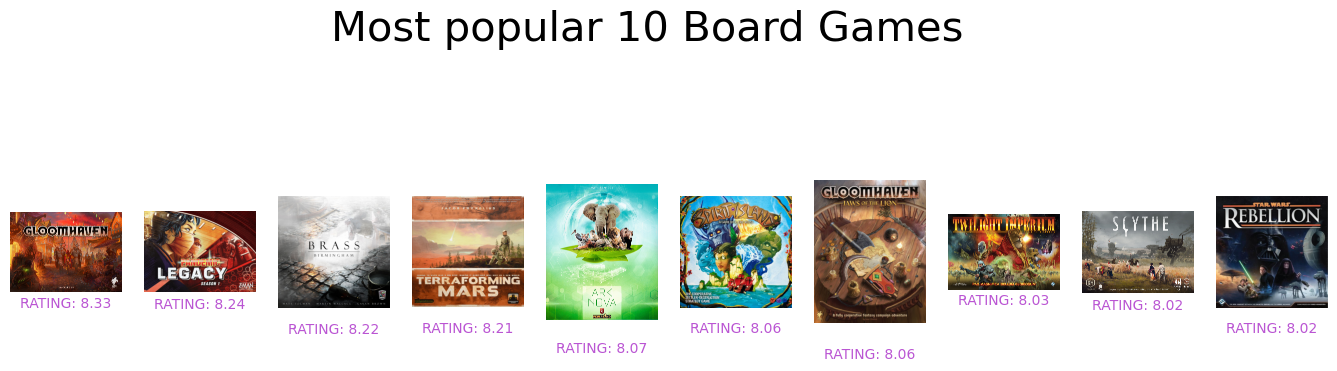

In [16]:
recs_top10=pd.DataFrame(popular_books(b_games,10))
fig,ax=plt.subplots(1,10,figsize=(17,5))
fig.suptitle("Most popular 10 Board Games",fontsize=30,color="black")
for i in range(len(recs_top10["boardgame_id"])):
    url=b_games.loc[b_games["boardgame_id"]==recs_top10["boardgame_id"][i],"image_link"][:1].values[0]
    img=Image.open(requests.get(url,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title((f'RATING: {round(recs_top10["Popularity"][i], 2)}'),
                    y=-0.3,
                    color="mediumorchid",
                    fontsize=10)
    fig.show()

In [17]:
train, test = train_test_split(ratings, test_size=0.25, random_state=1)

test = test.rename(columns={'nickname': 'user_id','boardgame_id':'item_id'})
train = train.rename(columns={'nickname': 'user_id','boardgame_id':'item_id'})
train.shape, test.shape

((752603, 15), (250868, 15))

In [18]:
recs_baseline = pd.DataFrame({'user_id': ratings['nickname'].unique()})
recs_baseline['item_id'] = [list(recs_top10['boardgame_id'].values) for i in range(len(recs_baseline))]
recs_baseline

,user_id,item_id
0,happyjosiah,"[174430, 161936, 224517, 167791, 342942, 16288..."
1,asaarto,"[174430, 161936, 224517, 167791, 342942, 16288..."
2,Christine Biancheria,"[174430, 161936, 224517, 167791, 342942, 16288..."
3,bitatmoonl,"[174430, 161936, 224517, 167791, 342942, 16288..."
4,DrGrayrock,"[174430, 161936, 224517, 167791, 342942, 16288..."
...,...,...
1627,lyxhope,"[174430, 161936, 224517, 167791, 342942, 16288..."
1628,Knecht Ruprecht,"[174430, 161936, 224517, 167791, 342942, 16288..."
1629,mac_s_1,"[174430, 161936, 224517, 167791, 342942, 16288..."
1630,marco27,"[174430, 161936, 224517, 167791, 342942, 16288..."


In [19]:
recs_baseline = recs_baseline.explode('item_id')
recs_baseline['rank'] = recs_baseline.groupby('user_id').cumcount() + 1
test_recs_baseline = test.set_index(['user_id', 'item_id']).join(recs_baseline.set_index(['user_id', 'item_id']))
test_recs_baseline = test_recs_baseline.sort_values(by=['user_id', 'rank'])
test_recs_baseline['users_item_count'] = test_recs_baseline.groupby(level='user_id', sort=False)['rank'].transform(np.size)
test_recs_baseline['reciprocal_rank'] = 1 / test_recs_baseline['rank']
test_recs_baseline['reciprocal_rank'] = test_recs_baseline['reciprocal_rank'].fillna(0)
test_recs_baseline['cumulative_rank'] = test_recs_baseline.groupby(level='user_id').cumcount() + 1
test_recs_baseline['cumulative_rank'] = test_recs_baseline['cumulative_rank'] / test_recs_baseline['rank']

In [20]:
top_N = 10
print('Метрики для бейзлайна')
users_count = test_recs_baseline.index.get_level_values('user_id').nunique()
for k in range(1, top_N + 1):
    hit_k = f'hit@{k}'
    test_recs_baseline[hit_k] = test_recs_baseline['rank'] <= k
    print(f'Precision@{k} = {(test_recs_baseline[hit_k] / k).sum() / users_count:.4f}')
    print(f"Recall@{k} = {(test_recs_baseline[hit_k] / test_recs_baseline['users_item_count']).sum() / users_count:.4f}")

mapN = (test_recs_baseline["cumulative_rank"] / test_recs_baseline["users_item_count"]).sum() / users_count
print(f"MAP@{top_N} = {mapN}")

mrr = test_recs_baseline.groupby(level='user_id')['reciprocal_rank'].max().mean()
print(f"MRR = {mrr}")


Метрики для бейзлайна
Precision@1 = 0.1654
Recall@1 = 0.0011
Precision@2 = 0.1691
Recall@2 = 0.0023
Precision@3 = 0.1656
Recall@3 = 0.0033
Precision@4 = 0.1835
Recall@4 = 0.0050
Precision@5 = 0.1810
Recall@5 = 0.0061
Precision@6 = 0.1812
Recall@6 = 0.0073
Precision@7 = 0.1666
Recall@7 = 0.0078
Precision@8 = 0.1582
Recall@8 = 0.0085
Precision@9 = 0.1670
Recall@9 = 0.0101
Precision@10 = 0.1645
Recall@10 = 0.0110
MAP@10 = 0.00468014981556719
MRR = 0.34566264005602154


**Подбираем лучшую модель**

*Item-to-item модель*

In [21]:
%%time
users_inv_mapping = dict(enumerate(ratings['nickname'].unique()))
users_mapping = {v: k for k, v in users_inv_mapping.items()}
len(users_mapping)

CPU times: user 35.4 ms, sys: 2.97 ms, total: 38.3 ms
Wall time: 36.7 ms


1632

In [22]:
items_inv_mapping = dict(enumerate(ratings['boardgame_id'].unique()))
items_mapping = {v: k for k, v in items_inv_mapping.items()}
len(items_mapping)

1999

In [23]:
ratings['title'] = ratings['title'].str.lower()
b_games['title'] = b_games['title'].str.lower()

In [24]:
item_titles = pd.Series(ratings['title'].values, index=ratings['boardgame_id']).to_dict()
len(item_titles), item_titles[432]

(1999, '6 nimmt!')

In [25]:
title_items = ratings.groupby('title')['boardgame_id'].agg(list)
title_items

title
 珊瑚礁大戰                                                                       [12962]
'ολου του κόσμου τα αγαθά                                                   [183840]
0-9                                [217449, 217449, 217449, 217449, 217449, 21744...
01: большой пожар                                                           [100901]
1 nacht weerwolven & waaghalzen    [147949, 147949, 147949, 147949, 147949, 14794...
                                                         ...                        
할리우드 골든 에이지                                                                    [904]
해저탐험                                                                [169654, 169654]
화이트채플에서 온 편지                                                          [59959, 59959]
황금의 땅 엘도라도                                                                  [217372]
황혼의 투쟁                                                                [12333, 12333]
Name: boardgame_id, Length: 8576, dtype: object

In [26]:
title_count = title_items.map(len)
title_count.value_counts()

1       2961
2        938
3        514
4        345
5        237
        ... 
469        1
1108       1
790        1
345        1
963        1
Name: boardgame_id, Length: 969, dtype: int64

In [27]:
title_items[title_count > 1].head()

title
0-9                                          [217449, 217449, 217449, 217449, 217449, 21744...
1 nacht weerwolven & waaghalzen              [147949, 147949, 147949, 147949, 147949, 14794...
1 nacht weerwolven & waaghalzen: dageraad                     [163166, 163166, 163166, 163166]
100000 лет до нашей эры                                           [34635, 34635, 34635, 34635]
13 days: the cuban missile crisis, 1962      [177590, 177590, 177590, 177590, 177590, 17759...
Name: boardgame_id, dtype: object

In [28]:
ratings['rating'] = np.array(ratings['rating'].values, dtype=np.float32)

ratings.loc[ratings['boardgame_id'].isin([217449, 163166])].groupby('boardgame_id').agg({
    'own': np.sum,
    'prevowned': np.sum,
    'fortrade': np.sum,
    'want': np.sum,
    'wanttoplay': np.sum,
    'wanttobuy': np.sum,
    'wishlist': np.sum,
    'preordered': np.sum,
    'rating': ['mean'],
    'last_modified': ['min', 'max'],
    
})


own prevowned fortrade want wanttoplay wanttobuy wishlist  \
              sum       sum      sum  sum        sum       sum      sum   
boardgame_id                                                              
163166        138        32        4    1          5         0        7   
217449        284       107        9    4          8         0       11   

             preordered    rating        last_modified                       
                    sum      mean                  min                  max  
boardgame_id                                                                 
163166                0  6.878872  2014-10-10 16:06:44  2023-02-05 08:56:00  
217449                2  6.534010  2017-02-03 03:28:28  2023-01-24 10:05:32

In [29]:
def compute_metrics(df_true, df_pred, top_N):
    result = {}
    test_recs = df_true.set_index(['user_id', 'item_id']).join(df_pred.set_index(['user_id', 'item_id']))
    test_recs = test_recs.sort_values(by=['user_id', 'rank'])

    test_recs['users_item_count'] = test_recs.groupby(level='user_id')['rank'].transform(np.size)
    test_recs['reciprocal_rank'] = (1 / test_recs['rank']).fillna(0)
    test_recs['cumulative_rank'] = test_recs.groupby(level='user_id').cumcount() + 1
    test_recs['cumulative_rank'] = test_recs['cumulative_rank'] / test_recs['rank']
    
    users_count = test_recs.index.get_level_values('user_id').nunique()
    for k in range(1, top_N + 1):
        hit_k = f'hit@{k}'
        test_recs[hit_k] = test_recs['rank'] <= k
        result[f'Precision@{k}'] = (test_recs[hit_k] / k).sum() / users_count
        result[f'Recall@{k}'] = (test_recs[hit_k] / test_recs['users_item_count']).sum() / users_count

    result[f'MAP@{top_N}'] = (test_recs["cumulative_rank"] / test_recs["users_item_count"]).sum() / users_count
    result[f'MRR'] = test_recs.groupby(level='user_id')['reciprocal_rank'].max().mean()
    return pd.Series(result)

In [30]:
def get_coo_matrix(df, 
                   user_col='user_id', 
                   item_col='item_id', 
                   weight_col=None, 
                   users_mapping=users_mapping, 
                   items_mapping=items_mapping):
    if weight_col is None:
        weights = np.ones(len(df), dtype=np.float32)
    else:
        weights = df[weight_col].astype(np.float32)

    interaction_matrix = sp.coo_matrix((
        weights, 
        (
            df[user_col].map(users_mapping.get), 
            df[item_col].map(items_mapping.get)
        )
    ))
    return interaction_matrix

In [31]:
train_mat = get_coo_matrix(train).tocsr()
train_mat

<1632x1999 sparse matrix of type '<class 'numpy.float32'>'
	with 746480 stored elements in Compressed Sparse Row format>

In [32]:
from implicit.nearest_neighbours import CosineRecommender, BM25Recommender, TFIDFRecommender

In [33]:
cosine_model = CosineRecommender(K=10)
cosine_model.fit(train_mat.T)

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00428009033203125 seconds
  warnings.warn(


  0%|          | 0/1632 [00:00<?, ?it/s]

In [34]:
#тестовый пользователь
top_N = 10
user_id = test['user_id'].iloc[0]
row_id = users_mapping[user_id]
print(f'Рекомендации для пользователя {user_id}, номер строки - {row_id}')

Рекомендации для пользователя Gregarius, номер строки - 780


In [35]:
recs = cosine_model.recommend(row_id, train_mat, N=top_N, filter_already_liked_items=True)
recs = pd.DataFrame({'col_id': recs[0], 'similarity': recs[1]}) 
recs

,col_id,similarity
0,764,35.515061
1,561,35.040362
2,1332,33.145226
3,1093,28.067396
4,979,26.833242
5,1380,23.225858
6,460,18.821630
7,1345,17.885326
8,1401,17.521368
9,1055,16.888665


In [36]:
recs['item_id'] = recs['col_id'].map(items_inv_mapping.get)
recs['title'] = recs['item_id'].map(item_titles.get)
recs

,col_id,similarity,item_id,title
0,764,35.515061,75165,de vulgari eloquentia
1,561,35.040362,220133,endangered
2,1332,33.145226,146418,warhammer: diskwars
3,1093,28.067396,152470,fief: france 1429
4,979,26.833242,51,ricochet robots
5,1380,23.225858,144239,impulse
6,460,18.821630,232405,western legends
7,1345,17.885326,159503,the captain is dead
8,1401,17.521368,234671,pandemic: rising tide
9,1055,16.888665,17405,1846: the race for the midwest


In [37]:
def generate_implicit_recs_mapper(model, train_matrix, N, user_mapping, item_inv_mapping):
    def _recs_mapper(user):
        user_id = user_mapping[user]
        recs = model.recommend(user_id, 
                               train_matrix, 
                               N=N, 
                               filter_already_liked_items=True)
        return [item_inv_mapping[item] for item in recs[0]]
    return _recs_mapper

In [38]:
mapper = generate_implicit_recs_mapper(cosine_model, train_mat, top_N, users_mapping, items_inv_mapping)
mapper

<function __main__.generate_implicit_recs_mapper.<locals>._recs_mapper(user)>

In [39]:
%time
recs = pd.DataFrame({'user_id': test['user_id'].unique()})
recs['item_id'] = recs['user_id'].map(mapper)
recs

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.01 µs


,user_id,item_id
0,Gregarius,"[75165, 220133, 146418, 152470, 51, 144239, 23..."
1,KubaP,"[75165, 220133, 146418, 152470, 51, 144239, 23..."
2,cypar7,"[75165, 220133, 146418, 152470, 51, 144239, 23..."
3,enemyoftheworld,"[75165, 220133, 146418, 152470, 51, 144239, 23..."
4,zafara,"[75165, 220133, 146418, 152470, 51, 144239, 23..."
...,...,...
1627,sinead2,"[75165, 220133, 146418, 152470, 51, 144239, 23..."
1628,jasonc213,"[75165, 220133, 146418, 152470, 51, 144239, 23..."
1629,Benjaminviking,"[75165, 220133, 146418, 152470, 51, 144239, 23..."
1630,Svennos,"[75165, 220133, 146418, 152470, 51, 144239, 23..."


In [40]:
recs = recs.explode('item_id')
recs['rank'] = recs.groupby('user_id').cumcount() + 1
recs.head(top_N + 2)

,user_id,item_id,rank
0,Gregarius,75165,1
0,Gregarius,220133,2
0,Gregarius,146418,3
0,Gregarius,152470,4
0,Gregarius,51,5
0,Gregarius,144239,6
0,Gregarius,232405,7
0,Gregarius,159503,8
0,Gregarius,234671,9
0,Gregarius,17405,10


In [41]:
metrics = compute_metrics(test, recs, top_N)
metrics

Precision@1     0.053309
Recall@1        0.000352
Precision@2     0.037990
Recall@2        0.000492
Precision@3     0.031658
Recall@3        0.000601
Precision@4     0.031556
Recall@4        0.000792
Precision@5     0.048652
Recall@5        0.001548
Precision@6     0.050960
Recall@6        0.001955
Precision@7     0.057423
Recall@7        0.002567
Precision@8     0.055147
Recall@8        0.002814
Precision@9     0.054398
Recall@9        0.003110
Precision@10    0.053799
Recall@10       0.003430
MAP@10          0.001030
MRR             0.124200
dtype: float64